In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [3]:
rows = soup.find_all('tr')
import re
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    list_rows.append(clean2)
df = pd.DataFrame(list_rows)

In [4]:
df.head()

,0
0,[]
1,"[M1A\n, Not assigned\n, Not assigned\n]"
2,"[M2A\n, Not assigned\n, Not assigned\n]"
3,"[M3A\n, North York\n, Parkwoods\n]"
4,"[M4A\n, North York\n, Victoria Village\n]"


In [5]:
df = df[0].str.split(',', expand = True)
df[0] = df[0].str.strip('[')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,M1A\n,Not assigned\n,Not assigned\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,M2A\n,Not assigned\n,Not assigned\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,M3A\n,North York\n,Parkwoods\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,M4A\n,North York\n,Victoria Village\n],None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
for i in range(df.shape[1]):
    df[i] = df[i].str.strip(']')
    df[i] = df[i].str.strip('\n')
df.rename(columns = {0: 'PostalCode', 1: 'Borough'}, inplace = True)
df.head()

,PostalCode,Borough,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,M1A,Not assigned,Not assigned,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,M2A,Not assigned,Not assigned,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,M3A,North York,Parkwoods,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,M4A,North York,Victoria Village,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
df1 = df[df['Borough'] != ' Not assigned'][1:]

In [9]:
df1.reset_index(drop = True, inplace = True)
df1.head()

,PostalCode,Borough,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M3A,North York,Parkwoods,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,M4A,North York,Victoria Village,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,M5A,Downtown Toronto,Regent Park,Harbourfront,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,M6A,North York,Lawrence Manor,Lawrence Heights,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,M7A,Downtown Toronto,Queen's Park,Ontario Provincial Government,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
df1['Neighbourhood'] = df1[df1.columns[2:]].apply(lambda x: ','.join(x.dropna().astype(str)), axis = 1)
df1.head()

,PostalCode,Borough,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,Neighbourhood
0,M3A,North York,Parkwoods,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Parkwoods
1,M4A,North York,Victoria Village,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Victoria Village
2,M5A,Downtown Toronto,Regent Park,Harbourfront,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"Regent Park, Harbourfront"
3,M6A,North York,Lawrence Manor,Lawrence Heights,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,Queen's Park,Ontario Provincial Government,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"Queen's Park, Ontario Provincial Government"


In [11]:
df1 = df1[['PostalCode','Borough','Neighbourhood']][0:103]

In [12]:
df1.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [13]:
geocode = pd.read_csv("Geospatial_Coordinates.csv")

In [14]:
geocode.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [15]:
trtdf = pd.merge(df1, geocode, left_on = 'PostalCode', right_on = 'Postal Code')

In [16]:
trtdf.head()

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494


In [17]:
cbs = trtdf[trtdf['Neighbourhood'] == ' Central Bay Street']
cbs.head()

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
24,M5G,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383


In [18]:
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from geopy.geocoders import Nominatim

In [19]:
CLIENT_ID = 'OVO4PKGIUFOTL1CFBRWNYD1R1KAK233BSXMEIL2EET0YSF1W' 
CLIENT_SECRET = 'XGGDYM10OPMAEVCIJ5LMIU2YMJMTBCKRF54JFPFH3P3JXF4G' 
VERSION = '20180605' 
Latitude = cbs.loc[24, 'Latitude']
Longitude = cbs.loc[24, 'Longitude']
Latitude

43.6579524

In [20]:
LIMIT = 200
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Latitude, 
    Longitude, 
    radius, 
    LIMIT)

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1f7f0840ea3c7ec7200c7a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 212,
  'suggestedBounds': {'ne': {'lat': 43.66695240900001,
    'lng': -79.37496583679133},
   'sw': {'lat': 43.64895239099999, 'lng': -79.39979936320866}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '537d4d6d498ec171ba22e7fe',
       'name': "Jimmy's Coffee",
       'location': {'address': '82 Gerrard Street W',
        'crossStreet': 'Gerrard & LaPlante',
        'lat': 43.65842123574496,
        'lng': -79.38561319551111,
 

In [22]:
def get_category_type(row):
    try:
        categoty_list = row['categories']
    except:
        category_list = row['venue.categories']
    if len(category_list) == 0:
        return None
    else:
        return category_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-537d4d6d498ec171ba22e7fe-0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",537d4d6d498ec171ba22e7fe,82 Gerrard Street W,CA,Toronto,Canada,Gerrard & LaPlante,...,"[{'label': 'display', 'lat': 43.65842123574496...",43.658421,-79.385613,NaN,M5G 1Z4,ON,Jimmy's Coffee,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5a81ae339deb7d369fa7f146-1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",5a81ae339deb7d369fa7f146,44 Gerrard St W,CA,Toronto,Canada,Yonge St,...,"[{'label': 'display', 'lat': 43.65883296982352...",43.658833,-79.383684,College Park,M5G,ON,Hailed Coffee,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-557231e3498e540f05f3083c-2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",557231e3498e540f05f3083c,70 Gerrard St West,CA,Toronto,Canada,Bay St,...,"[{'label': 'display', 'lat': 43.65856999999997...",43.658570,-79.385123,NaN,M5G 1J5,ON,Tim Hortons,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ab2b0b9f964a520e56b20e3-3,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",4ab2b0b9f964a520e56b20e3,35 Elm St.,CA,Toronto,Canada,at Bay St.,...,"[{'label': 'display', 'lat': 43.65747228208784...",43.657472,-79.383524,NaN,M5G 1H1,ON,The Queen and Beaver Public House,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5db70a0c306d6b000861ac9f-4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",5db70a0c306d6b000861ac9f,770 Bay Street Unit 3,CA,Toronto,Canada,NaN,...,"[{'label': 'display', 'lat': 43.66014, 'lng': ...",43.660140,-79.385870,NaN,M5G 0A6,ON,Neo Coffee Bar,0,[],NaN


In [24]:
filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Jimmy's Coffee,Coffee Shop,43.658421,-79.385613
1,Hailed Coffee,Coffee Shop,43.658833,-79.383684
2,Tim Hortons,Coffee Shop,43.658570,-79.385123
3,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524
4,Neo Coffee Bar,Coffee Shop,43.660140,-79.385870


In [25]:
len(nearby_venues['categories'].unique())

64

In [26]:
cbs_onehot = pd.get_dummies(nearby_venues[['categories']], prefix = "", prefix_sep = "")
cbs_onehot['Neighbourhood'] = 'Central Bay Street'
cbs_onehot.head()

,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Bakery,Bar,Beer Bar,Bookstore,Breakfast Spot,Bubble Tea Shop,...,Souvlaki Shop,Supermarket,Sushi Restaurant,Tanning Salon,Tea Room,Theater,University,Vegetarian / Vegan Restaurant,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central Bay Street
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central Bay Street
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central Bay Street
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central Bay Street
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Central Bay Street


In [27]:
cols = list(cbs_onehot.columns)
cols = [cols[-1]] + cols[:-1]
cbs_onehot = cbs_onehot[cols]
cbs_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Bakery,Bar,Beer Bar,Bookstore,Breakfast Spot,...,Smoke Shop,Souvlaki Shop,Supermarket,Sushi Restaurant,Tanning Salon,Tea Room,Theater,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Bay Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
cbs_onehot_grouped = cbs_onehot.groupby('Neighbourhood').mean().reset_index()
cbs_onehot_grouped

,Neighbourhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Bakery,Bar,Beer Bar,Bookstore,Breakfast Spot,...,Smoke Shop,Souvlaki Shop,Supermarket,Sushi Restaurant,Tanning Salon,Tea Room,Theater,University,Vegetarian / Vegan Restaurant,Yoga Studio
0,Central Bay Street,0.01,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.02


In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    return row_categories_sorted.index.values[0:num_top_venues]


In [30]:
s = return_most_common_venues(cbs_onehot_grouped.iloc[0,:], 5)
s

array(['Coffee Shop', 'Pizza Place', 'Park', 'Clothing Store', 'Café'],
      dtype=object)

In [31]:
num_top_venues = 5
indicators = ['st','nd','rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind + 1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind + 1))

neighborhoods_venues_sorted = pd.DataFrame(columns = columns)

In [32]:
row1 = np.array(['Central Bay Street'])
row1 = np.append(row1, s)
col = list(neighborhoods_venues_sorted.columns)
row1 = pd.DataFrame([row1], columns = col)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.append(row1, ignore_index = True)

In [33]:
neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Bay Street,Coffee Shop,Pizza Place,Park,Clothing Store,Café


In [34]:
map_cbs = folium.Map(location = [Latitude, Longitude], zoom_start = 11)
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
                        [lat, lng],
                        radius = 5,
                        popup = label,
                        color = 'blue',
                        fill = True,
                        fill_color = '#3186cc',
                        fill_opacity = 0.7,
                        parse_html = False
                        ).add_to(map_cbs)
map_cbs

In [35]:
vancouver_data = pd.read_csv("local-area-boundary.csv", escapechar = ',')

In [36]:
vancouver_data = vancouver_data.iloc[:,0].str.split(';', expand = True)

In [37]:
vancouver_data[['Lat','Lng']] = vancouver_data[3].str.split("-",expand=True)
vancouver_data['Lng'] = '-' + vancouver_data['Lng']

In [38]:
vancouver_data = vancouver_data[[1, 'Lat', 'Lng']].rename(columns = {1: 'Neighborhood'})
vancouver_data.head()

,Neighborhood,Lat,Lng
0,Dunbar-Southlands,49.2379619063,-123.189546803
1,Kerrisdale,49.2236554855,-123.159576182
2,Killarney,49.2170216717,-123.037647029
3,Kitsilano,49.2675398494,-123.16329474
4,South Cambie,49.2455564633,-123.121800916


In [39]:
vancouver = [49.282729, -123.120738]
map_vancouver = folium.Map(location = vancouver, zoom_start = 11)
for lat, lng, label in zip(vancouver_data['Lat'].astype('float'), vancouver_data['Lng'].astype('float'), vancouver_data['Neighborhood']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
                        [lat, lng],
                        radius = 5,
                        popup = label,
                        color = 'blue',
                        fill = True,
                        fill_color = '#3186cc',
                        fill_opacity = 0.7,
                        parse_html = False
                        ).add_to(map_vancouver)
map_vancouver

In [40]:
def getNearbyVenues(names, latitude, longitude, radius = 1000):
    venues_list = []
    for name, lat, lng in zip(names, latitude, longitude):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        for v in results:
            venues_list.append([(
                name,
                lat,
                lng,
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['categories'][0]['name'])])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                             'Latitude',
                             'Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    return(nearby_venues)
    

In [41]:
vancouver_venues = getNearbyVenues(vancouver_data['Neighborhood'], vancouver_data['Lat'], vancouver_data['Lng'])
vancouver_venues.head()

,Neighbourhood,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dunbar-Southlands,49.2379619063,-123.189546803,Red Tuna,49.234746,-123.184952,Japanese Restaurant
1,Dunbar-Southlands,49.2379619063,-123.189546803,Crépe Café,49.234683,-123.182066,Café
2,Dunbar-Southlands,49.2379619063,-123.189546803,Dunbar Theater,49.245613,-123.185428,Indie Movie Theater
3,Dunbar-Southlands,49.2379619063,-123.189546803,Blaq Sheep Coffee House And Bistro,49.235501,-123.185324,Coffee Shop
4,Dunbar-Southlands,49.2379619063,-123.189546803,Save-On-Foods,49.235005,-123.184119,Grocery Store


In [42]:
len(vancouver_venues['Venue Category'].unique())

218

In [43]:
A = vancouver_venues.groupby('Neighbourhood').count()
A['Neighborhood'] = A.index.values
A.head()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Neighborhood
Neighbourhood,,,,,,,
Arbutus-Ridge,22,22,22,22,22,22,Arbutus-Ridge
Downtown,100,100,100,100,100,100,Downtown
Dunbar-Southlands,22,22,22,22,22,22,Dunbar-Southlands
Fairview,100,100,100,100,100,100,Fairview
Grandview-Woodland,100,100,100,100,100,100,Grandview-Woodland


Text(0.5, 1.0, 'Number of Venue Categories')

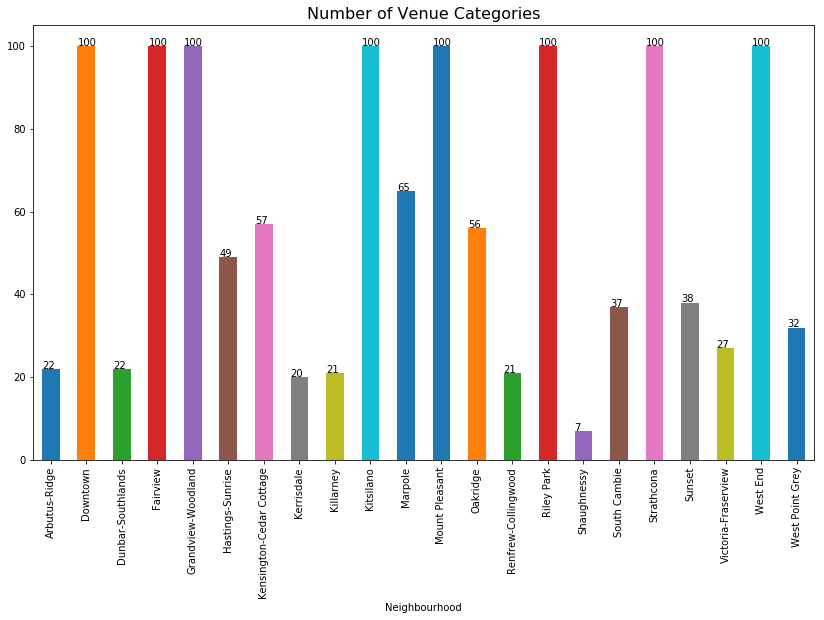

In [44]:
ax = A['Venue Category'].plot(kind = 'bar', figsize = (14,8))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{}'.format(height), (x, y + height + 0.05))
ax.set_title("Number of Venue Categories", fontsize = 16)

In [45]:
vancouver_onehot = pd.get_dummies(vancouver_venues['Venue Category'], prefix = "", prefix_sep = "")
vancouver_onehot.insert(0, 'Neighbourhood', vancouver_venues['Neighbourhood'])
vancouver_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Wine Shop,Women's Store,Yoga Studio
0,Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dunbar-Southlands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
vancouver_grouped = vancouver_onehot.groupby('Neighbourhood').mean().reset_index()
vancouver_grouped = vancouver_grouped.append(cbs_onehot_grouped, ignore_index = True, sort = False)
vancouver_grouped.replace(np.NaN, 0.0, inplace = True)
vancouver_grouped

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Comic Shop,Creperie,Distribution Center,Historic Site,Hobby Shop,Modern European Restaurant,Monument / Landmark,Souvlaki Shop,Tanning Salon,University
0,Arbutus-Ridge,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Downtown,0.010000,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Dunbar-Southlands,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Fairview,0.010000,0.00,0.010000,0.000000,0.00,0.02,0.020000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Grandview-Woodland,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.020000,0.01000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Hastings-Sunrise,0.000000,0.00,0.020408,0.020408,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Kensington-Cedar Cottage,0.000000,0.00,0.035088,0.000000,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Kerrisdale,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Killarney,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Kitsilano,0.000000,0.00,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, random_state = 0).fit(vancouver_grouped.iloc[:, 2:])
kmeans.labels_

array([6, 6, 0, 6, 0, 3, 3, 5, 3, 6, 3, 0, 3, 4, 6, 2, 1, 0, 3, 3, 6, 3,
       6], dtype=int32)

In [63]:
vancouver_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
vancouver_grouped.head()

,Cluster Labels,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Comic Shop,Creperie,Distribution Center,Historic Site,Hobby Shop,Modern European Restaurant,Monument / Landmark,Souvlaki Shop,Tanning Salon,University
0,6,Arbutus-Ridge,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,Downtown,0.01,0.0,0.00,0.0,0.01,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Dunbar-Southlands,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,Fairview,0.01,0.0,0.01,0.0,0.00,0.02,0.02,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Grandview-Woodland,0.00,0.0,0.00,0.0,0.00,0.00,0.02,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
vancouver_grouped[vancouver_grouped['Neighbourhood'] == 'Central Bay Street']

,Cluster Labels,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Comic Shop,Creperie,Distribution Center,Historic Site,Hobby Shop,Modern European Restaurant,Monument / Landmark,Souvlaki Shop,Tanning Salon,University
22,6,Central Bay Street,0.0,0.0,0.01,0.0,0.02,0.02,0.0,0.0,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [74]:
Neighborhoods = vancouver_grouped[vancouver_grouped['Cluster Labels'] == vancouver_grouped.loc[22, 'Cluster Labels']]

In [75]:
Neighborhoods.reset_index(drop = True, inplace = True)
Neighborhoods

,Cluster Labels,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Comic Shop,Creperie,Distribution Center,Historic Site,Hobby Shop,Modern European Restaurant,Monument / Landmark,Souvlaki Shop,Tanning Salon,University
0,6,Arbutus-Ridge,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6,Downtown,0.01,0.00,0.00,0.0,0.01,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,6,Fairview,0.01,0.00,0.01,0.0,0.00,0.02,0.02,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6,Kitsilano,0.00,0.00,0.01,0.0,0.00,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,6,Riley Park,0.00,0.00,0.01,0.0,0.01,0.02,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,6,West End,0.00,0.01,0.01,0.0,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,6,Central Bay Street,0.00,0.00,0.01,0.0,0.02,0.02,0.00,0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Neighborhoods['Neighbourhood']

for ind in np.arange(Neighborhoods.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Neighborhoods.iloc[ind, 1:], num_top_venues)
neighborhoods_venues_sorted.iloc[6, 1:] = return_most_common_venues(cbs_onehot_grouped.iloc[0, :], num_top_venues)


In [69]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arbutus-Ridge,Shopping Mall,Bakery,Park,Italian Restaurant,Event Space
1,Downtown,Hotel,Restaurant,Coffee Shop,Italian Restaurant,Seafood Restaurant
2,Fairview,Coffee Shop,Furniture / Home Store,Park,Restaurant,Japanese Restaurant
3,Kitsilano,Coffee Shop,Bakery,Café,Vegetarian / Vegan Restaurant,Sushi Restaurant
4,Riley Park,Coffee Shop,Café,Park,Grocery Store,Japanese Restaurant
5,West End,Hotel,Japanese Restaurant,Dessert Shop,Ramen Restaurant,Coffee Shop
6,Central Bay Street,Coffee Shop,Pizza Place,Park,Clothing Store,Café


In [76]:
Neighborhoods = pd.merge(Neighborhoods, vancouver_data, left_on = 'Neighbourhood', right_on = 'Neighborhood')
Neighborhoods

,Cluster Labels,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Historic Site,Hobby Shop,Modern European Restaurant,Monument / Landmark,Souvlaki Shop,Tanning Salon,University,Neighborhood_y,Lat,Lng
0,6,Arbutus-Ridge,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arbutus-Ridge,49.2468049108,-123.161669238
1,6,Downtown,0.01,0.00,0.00,0.0,0.01,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Downtown,49.2807470711,-123.116567008
2,6,Fairview,0.01,0.00,0.01,0.0,0.00,0.02,0.02,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fairview,49.2645404871,-123.131048865
3,6,Kitsilano,0.00,0.00,0.01,0.0,0.00,0.01,0.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kitsilano,49.2675398494,-123.16329474
4,6,Riley Park,0.00,0.00,0.01,0.0,0.01,0.02,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Riley Park,49.2447664796,-123.103146806
5,6,West End,0.00,0.01,0.01,0.0,0.01,0.00,0.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,West End,49.2850111894,-123.135437653


In [77]:
CompanyB = [49.27071645,-123.09744954633206]
map_neighborhoods = folium.Map(location = CompanyB, zoom_start = 11)
folium.Circle([49.27071645,-123.09744954633206], 500, fill=True).add_child(folium.Popup('CompanyB')).add_to(map_neighborhoods)
for name, lat, lon in zip(Neighborhoods['Neighbourhood'], Neighborhoods['Lat'].astype('float'), Neighborhoods['Lng'].astype('float')):
    label = folium.Popup(str(name), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7).add_to(map_neighborhoods)
map_neighborhoods